In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

df=pd.read_csv(r'C:\Users\elham\OneDrive\Desktop\Excel Project\dataset\TShirt_size.csv')

In [51]:
df.head(2)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,M
1,158,59,M


In [52]:
data_path=r'C:\Users\elham\OneDrive\Desktop\Excel Project\dataset\TShirt_size.csv'
df2=pd.read_csv(data_path)

columns=['Height','Weight','T_shirt_Size']
df2.columns=columns
df2.columns







Index(['Height', 'Weight', 'T_shirt_Size'], dtype='object')

In [53]:
for col in df2.columns:
    print(col)

df2.columns.values[2]='shirt_Size'

df2.columns





Height
Weight
T_shirt_Size


Index(['Height', 'Weight', 'shirt_Size'], dtype='object')

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Height      18 non-null     int64 
 1   Weight      18 non-null     int64 
 2   shirt_Size  18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [55]:
for col in df2.columns:
    print(col)
    print(df2[col].unique())
    print(df2[col].value_counts())

Height
[158 160 163 165 168 170]
158    3
160    3
163    3
165    3
168    3
170    3
Name: Height, dtype: int64
Weight
[58 59 63 60 61 64 62 65 66 68]
63    3
64    3
59    2
60    2
61    2
62    2
58    1
65    1
66    1
68    1
Name: Weight, dtype: int64
shirt_Size
['M' 'L']
L    11
M     7
Name: shirt_Size, dtype: int64


In [56]:
#practice only turn obj to int
#df2['shirt_Size']=pd.to_numeric(df2['shirt_Size'],errors='coerce')
#df2.info()


In [57]:
df2.dtypes

Height         int64
Weight         int64
shirt_Size    object
dtype: object

In [ ]:
df2.drop('shirt_Size',axis=1, inplace=True)

In [36]:
df2.head(2)

,Height,Weight
0,158,58
1,158,59


In [62]:
df2.isnull().sum()

Height        0
Weight        0
shirt_Size    0
dtype: int64

In [63]:
df2.isna().sum()

Height        0
Weight        0
shirt_Size    0
dtype: int64

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

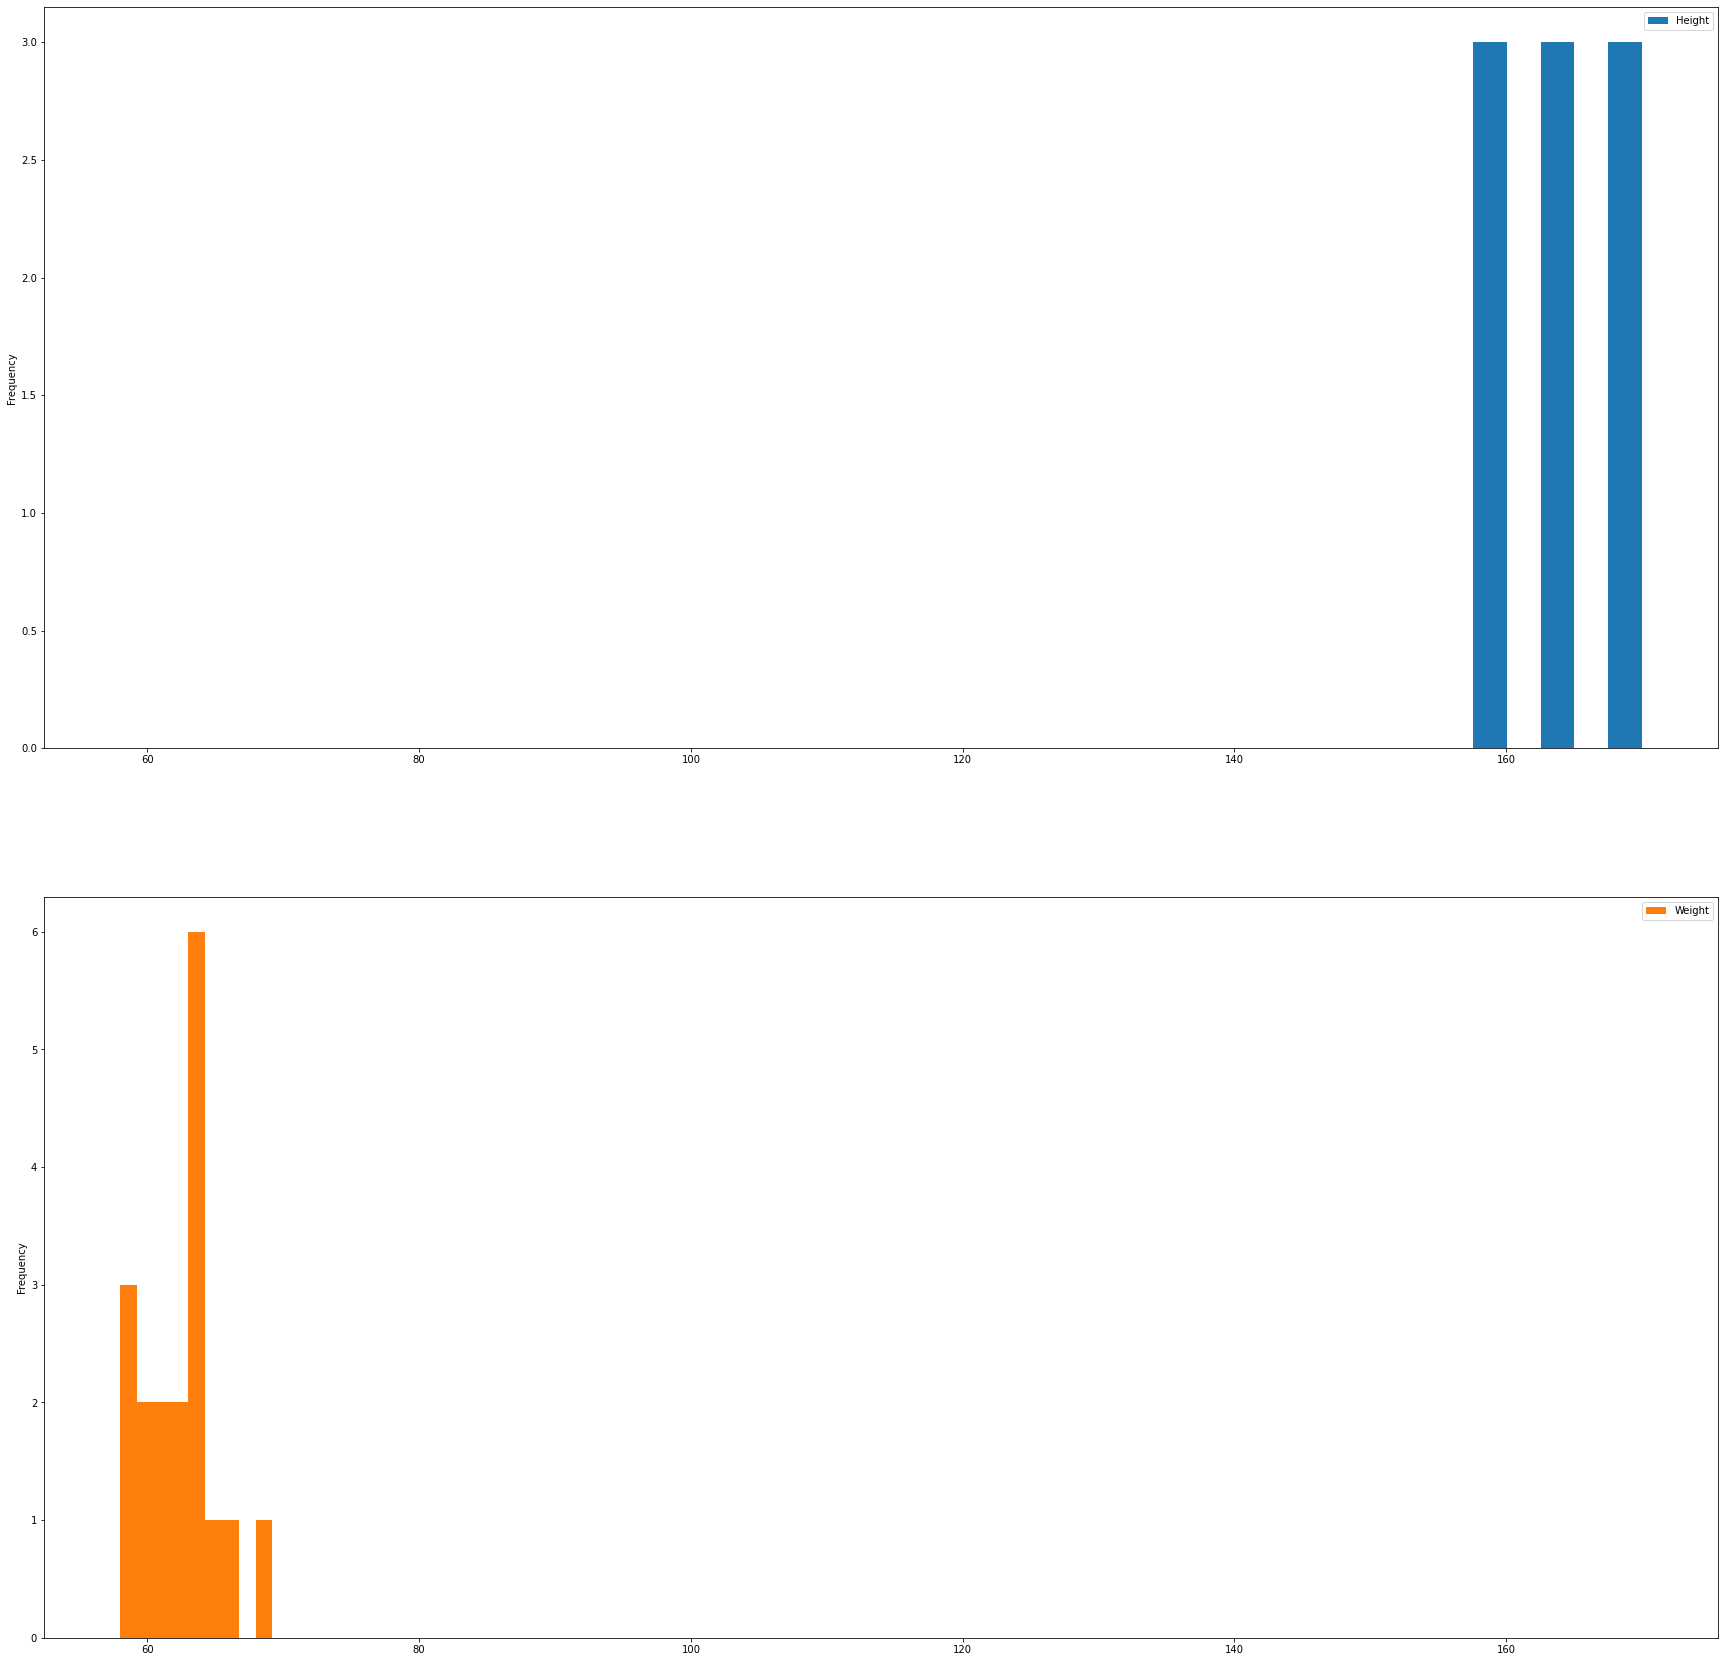

In [71]:
plt.rcParams['figure.figsize']=(30,30)
df2.plot(kind='hist',bins=90,subplots=True,sharex=False,sharey=False)

In [74]:
correlation=df2.corr()

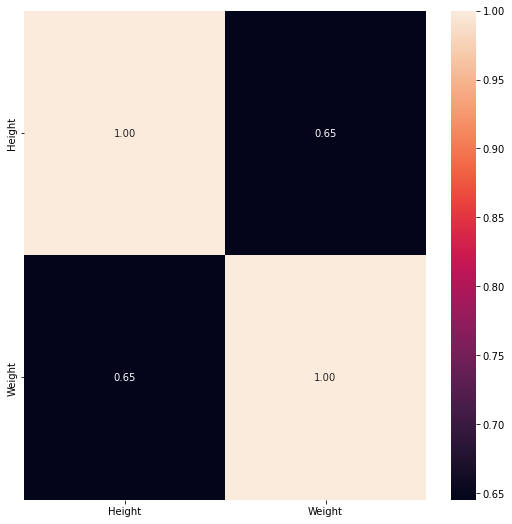

In [78]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation,annot=True,fmt='.2f')

plt.show()

In [81]:
x=df2.drop('shirt_Size',axis=1)
y=df2['shirt_Size']
y.head(2)

0    M
1    M
Name: shirt_Size, dtype: object

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [86]:
x_train.shape, x_test.shape

((14, 2), (4, 2))

In [89]:
#for df3 in x_train:
for col in x_train.columns:
    col_median=x_train[col].median()
    x_train.fillna(col_median,inplace=True)
        

In [90]:
x_train.isnull().sum()

Height    0
Weight    0
dtype: int64

In [91]:
x_train.head(2)

,Height,Weight
7,160,64
17,170,68


In [92]:
x_test.head(2)

,Height,Weight
9,165,61
14,168,66


In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train2=scaler.fit_transform(x_train)
print(x_train2)

[[0.16666667 0.6       ]
 [1.         1.        ]
 [1.         0.6       ]
 [0.58333333 0.7       ]
 [0.41666667 0.2       ]
 [0.83333333 0.5       ]
 [0.16666667 0.1       ]
 [0.16666667 0.2       ]
 [0.41666667 0.3       ]
 [0.         0.5       ]
 [0.         0.        ]
 [0.83333333 0.4       ]
 [0.41666667 0.6       ]
 [0.58333333 0.4       ]]


In [99]:
#mean=0, standard deviation=1
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
x_train3=scaler2.fit_transform(x_train)
print(x_train3)

[[-0.90424963  0.64362423]
 [ 1.57800426  2.21070932]
 [ 1.57800426  0.64362423]
 [ 0.33687731  1.03539551]
 [-0.15957346 -0.92346086]
 [ 1.08155348  0.25185296]
 [-0.90424963 -1.31523213]
 [-0.90424963 -0.92346086]
 [-0.15957346 -0.53168958]
 [-1.40070041  0.25185296]
 [-1.40070041 -1.7070034 ]
 [ 1.08155348 -0.13991831]
 [-0.15957346  0.64362423]
 [ 0.33687731 -0.13991831]]


In [105]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

['L' 'L' 'L' 'M']


In [107]:
y_pred2=model.predict_proba(x_test)
print(y_pred2)

[[0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]]


In [ ]:
https://www.kaggle.com/code/prashant111/knn-classifier-tutorial